In [2]:
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys

In [3]:
assert hasattr(tf, "function") 

# Load the dataset: Fashion MNIST

In [4]:
from sklearn.preprocessing import StandardScaler

# Fashio MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (images_test, targets_test) = fashion_mnist.load_data()

# Get only a subpart of the dataset
images = images[:10000]
targets = targets [:10000]

# Reshape the dataset and convert to float
images = images.reshape(-1, 784)
images = images.astype(float)
images_test = images_test.reshape(-1, 784)
images_test = images_test.astype(float)

scaler = StandardScaler()
images = scaler.fit_transform(images)
images_test = scaler.transform(images_test)

print(images.shape)
print(targets.shape)

4422102/4422102 [==============================] - 6s 1us/step
(10000, 784)
(10000,)


# Plot one of the data

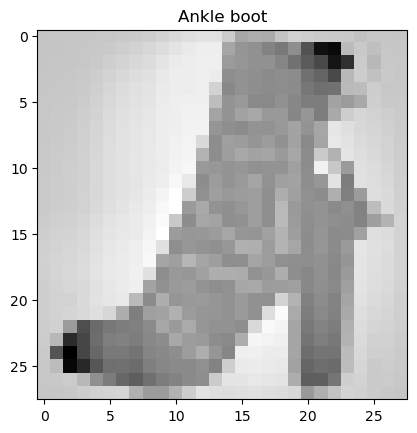

In [5]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
                 "Shirt", "Sneaker", "Bag", "Ankle boot"
]
# Plot one image
plt.imshow(np.reshape(images[11], (28, 28)), cmap="binary")
plt.title(targets_names[targets[11]])
plt.show()

# Create the model

In [6]:
# Flatten
model = tf.keras.models.Sequential()

# Add the layers
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model_output = model.predict(images[0:1])
print(model_output, targets[0:1])


1/1 [==============================] - 0s 256ms/step
[[0.1565248  0.11496447 0.21206057 0.13014099 0.15143578 0.0473944
  0.03480564 0.08994332 0.02797635 0.03475366]] [9]


# Model Summary

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Compile the model

In [8]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

# Train the model

In [9]:
history = model.fit(images, targets, epochs=10, validation_split=0.2)

Epoch 1/10


250/250 [==============================] - 1s 4ms/step - loss: 0.8824 - accuracy: 0.7144 - val_loss: 0.6185 - val_accuracy: 0.7865
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.5270 - accuracy: 0.8144 - val_loss: 0.5258 - val_accuracy: 0.8100
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4438 - accuracy: 0.8457 - val_loss: 0.4858 - val_accuracy: 0.8270
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3963 - accuracy: 0.8610 - val_loss: 0.4525 - val_accuracy: 0.8435
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3624 - accuracy: 0.8734 - val_loss: 0.4405 - val_accuracy: 0.8485
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3349 - accuracy: 0.8844 - val_loss: 0.4298 - val_accuracy: 0.8510
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3124 - accuracy: 0.8917 - val_loss: 0.4277 - val_accuracy: 0.8500
Epoc